# MLPClassifier: 다층 퍼셉트론 분류기

## 개요 이해

In [ ]:
# 데이터셋: 사이킷런의 make_moons 데이터를 사용

#     사이킷런의 make_moons 함수는 비선형 패턴을 가진 이진 분류 문제를 위해 인공적으로 생성된 데이터셋입니다.
# 두 개의 반달 모양(즉, 두 개의 "초승달" 모양)으로 데이터를 생성하므로 "moons"라는 이름이 붙었습니다.
# 이 데이터셋은 머신러닝 모델, 특히 비선형 분류 성능을 평가하기 위해 많이 사용됩니다.

# 특징
# 비선형성: 데이터 포인트들이 반달 모양으로 배열되어 있어 선형 분류 알고리즘(예: 로지스틱 회귀)이 잘 작동하지 않습니다.
# 클래스 불균형 없음: 각 클래스는 거의 같은 수의 데이터를 가지므로 클래스 불균형 문제가 없습니다.
# 잡음 추가 가능: noise 파라미터를 통해 데이터에 임의의 잡음을 추가할 수 있습니다.

사이킷런(sklearn.neural_network)의 MLPClassifier는 Multi-Layer Perceptron (MLP) 기반의 신경망 모델로, 분류 문제에 사용됩니다.

이 모델은 입력층, 은닉층(hidden layers), 출력층으로 구성된 인공 신경망 구조를 가집니다.

주요 단계
1. 라이브러리/ 데이터 준비
2. ANN 모델 생성
3. 모델 학습
4. 학습 결과 시각화

## 라이브로리/데이터 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons  # 데이터 셋 생성
from sklearn.model_selection import train_test_split  #  데이터 분할
from sklearn.preprocessing import StandardScaler  # 데이터 정규화
from sklearn.neural_network import MLPClassifier  # 분류기
from sklearn.metrics import classification_report, confusion_matrix # 모델 평가

# 1. 데이터 생성 및 전처리
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42) #  총 1,000개의 데이터 포인트를 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# n_samples=1000:
# 생성할 데이터 포인트의 개수입니다. 총 1,000개의 데이터 포인트를 생성합니다.
# noise=0.2:
# 데이터에 추가할 **잡음(noise)**의 정도를 나타냅니다.
# 값이 클수록 데이터가 더 불규칙해지고, 분류가 어려워집니다.
# random_state=42:
# 랜덤 시드 값을 설정하여 동일한 결과를 재현할 수 있도록 합니다.

In [ ]:
# test_size=0.3:
# 전체 데이터의 **30%**를 테스트 데이터로 사용하고, 나머지 **70%**를 학습 데이터로 사용합니다.
# random_state=42:
# 랜덤 시드 값을 설정하여 데이터를 분리할 때 재현 가능성을 보장합니다.

In [ ]:
# StandardScaler:
# 데이터의 평균을 0, 표준편차를 1로 변환하여 **표준화(정규화)**를 수행합니다.
# 신경망 모델(예: MLPClassifier)에서는 입력 데이터의 스케일(크기 차이)이 클 경우 학습이 잘 되지 않으므로, 표준화를 통해 학습 효율을 높일 수 있습니다.

# fit_transform(X_train):
# 학습 데이터(X_train)에 대해 평균과 표준편차를 계산한 뒤, 이를 사용해 데이터를 표준화합니다.
# transform(X_test):
# 테스트 데이터(X_test)는 학습 데이터에서 계산된 평균과 표준편차를 사용해 표준화합니다.

## 모델 생성/학습

In [ ]:
# 2. ANN 모델 생성 (은닉층 2개, 각각 10개의 뉴런)
model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

In [ ]:
# MLPClassifier**는 다층 퍼셉트론(MLP) 기반의 분류 모델로, 기본적인 신경망 구조를 제공합니다. 여기서 사용된 주요 파라미터를 설명하겠습니다.

# 파라미터 설명
# hidden_layer_sizes=(10, 10):
# **은닉층(hidden layer)**의 구조를 정의합니다.
# (10, 10)은 2개의 은닉층이 있으며, 각각 10개의 뉴런을 가진다는 의미입니다.
# 첫 번째 은닉층: 10개의 뉴런
# 두 번째 은닉층: 10개의 뉴런
# 만약 (20,)이라면, 은닉층이 1개이고 20개의 뉴런을 가진 구조입니다.

# activation='relu':
# 활성화 함수(activation function)를 설정합니다.
# ReLU 함수는 입력 값이 0보다 작으면 0, 0보다 크면 그대로 출력합니다: f(x) = max(0, x)
# 다른 옵션:
# 'logistic': 시그모이드(sigmoid) 함수, 출력이 (0, 1) 범위에 있음
# 'tanh': 하이퍼볼릭 탄젠트 함수, 출력이 (-1, 1) 범위에 있음
# 'identity': 선형 함수, f(x) = x

#     max_iter=1000:
# 모델이 학습하는 동안의 최대 에포크(epoch) 수를 의미합니다.
# max_iter 값이 작으면 충분히 학습하지 못할 수 있으며, 너무 크면 학습 시간이 오래 걸릴 수 있습니다.

# random_state=42:
# 랜덤 시드(random seed) 값을 설정합니다.
# 데이터를 섞거나 초기 가중치를 설정할 때 랜덤성을 제어하여, 재현 가능한 결과를 얻을 수 있도록 합니다.

In [ ]:
# fit(X_train, y_train):
# 입력 데이터(X_train)와 레이블(y_train)을 사용해 모델을 학습시킵니다.
# **역전파 알고리즘(backpropagation)**을 사용해 가중치를 업데이트합니다.
# 이 과정에서 모델은 **손실 함수(loss function)**를 최소화하는 방향으로 학습합니다.
# 학습이 완료되면 모델은 데이터의 패턴과 관계를 학습하게 됩니다.


In [ ]:
# 학습 후 정확도 확인
accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {accuracy:.2f}")


Training Accuracy: 0.97


In [ ]:
# 학습 결과 확인
# 모델이 학습된 후에는 **예측(predict)**이나 평가(score) 메서드를 사용해 성능을 확인할 수 있습니다.

## 모델 평가

학습된 ANN 모델을 평가하기 위해 예측 결과를 만들고, 혼동 행렬(confusion matrix)과 분류 보고서(classification report)를 출력합니다.

In [ ]:
# 3. 모델 평가
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[152   4]
 [  5 139]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       156
           1       0.97      0.97      0.97       144

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [ ]:
# 예측 (predict 메서드)
# y_pred = model.predict(X_test)
# model.predict(X_test):
# 학습된 모델을 사용해 테스트 데이터(X_test)의 레이블을 예측합니다.
# y_pred는 모델이 예측한 클래스(0 또는 1)로 이루어진 배열입니다.
# 테스트 데이터를 사용하여 모델이 학습되지 않은 새로운 데이터를 얼마나 잘 분류하는지 평가합니다.

# 2. 혼동 행렬 (Confusion Matrix)
# print(confusion_matrix(y_test, y_pred))
# confusion_matrix(y_test, y_pred):
# 실제 레이블(y_test)과 예측된 레이블(y_pred)을 비교하여 혼동 행렬을 생성합니다.

# 혼동 행렬의 구성 요소: 한글파일 1 참조할것
# True Positive (TP): 실제 클래스가 1이고, 예측도 1인 경우
# True Negative (TN): 실제 클래스가 0이고, 예측도 0인 경우
# False Positive (FP): 실제 클래스가 0인데, 예측은 1인 경우 (Type I Error)
# False Negative (FN): 실제 클래스가 1인데, 예측은 0인 경우 (Type II Error)

# 3. 분류 보고서 (Classification Report)
# print(classification_report(y_test, y_pred))
# classification_report(y_test, y_pred):
# 모델의 평가 지표인 정밀도(precision), 재현율(recall), F1-score, **정확도(accuracy)**를 출력합니다.

## 시각화

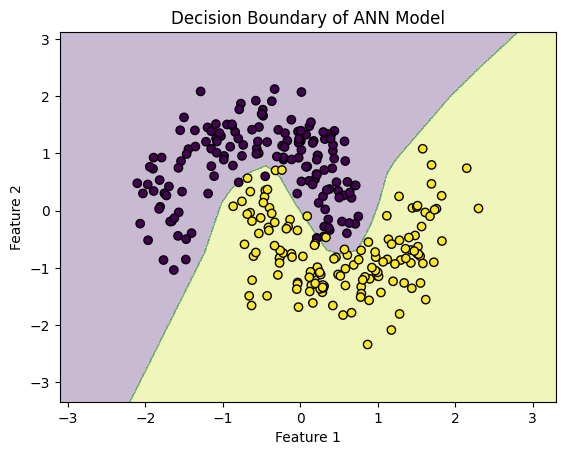

In [ ]:
# 4. 결정 경계 시각화
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title("Decision Boundary of ANN Model")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_test, y_test, model)


In [ ]:
# 그래프 영역 설정
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# x_min과 x_max는 첫 번째 특징(feature)의 최소값과 최대값을 기준으로 그래프의 가로축 범위를 설정합니다.
# y_min과 y_max는 두 번째 특징(feature)의 최소값과 최대값을 기준으로 세로축 범위를 설정합니다.
# 각 값에 -1 또는 +1을 더해 그래프를 약간 여유 있게 표시합니다.

# 격자 생성 (meshgrid)
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
#                      np.arange(y_min, y_max, 0.01))
# np.meshgrid()는 그래프 영역을 촘촘한 격자(grid)로 만듭니다.
# 0.01은 격자의 간격으로, 작을수록 더 세밀한 결정 경계가 생성됩니다.

# 예측 값 계산
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# xx.ravel()과 yy.ravel()은 격자 포인트를 1차원 배열로 펼칩니다.
# np.c_[]는 두 배열을 열 방향으로 결합해 (x, y) 포인트들을 생성합니다.
# model.predict()를 사용해 격자 포인트들의 클래스를 예측합니다.
# Z.reshape(xx.shape)는 예측 결과(Z)를 원래 격자 형태로 다시 변환합니다.

# 결정 경계 그리기 (contourf)
# plt.contourf(xx, yy, Z, alpha=0.3)
# plt.contourf()는 결정 경계를 그립니다.
# Z 값에 따라 다른 색상으로 채워져 모델이 분류한 영역을 시각적으로 표시합니다.
# alpha=0.3은 투명도 설정으로, 배경과 데이터 포인트가 겹쳐도 잘 보이도록 합니다.

# 데이터 포인트 시각화
# plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
# plt.scatter()는 테스트 데이터 포인트들을 플로팅합니다.
# c=y는 데이터 포인트의 색상을 실제 레이블(y)에 따라 다르게 표시합니다.
# edgecolor='k'는 데이터 포인트의 테두리를 검은색으로 설정합니다.

# 그래프 설정 및 표시
# plt.title("Decision Boundary of ANN Model")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.show()
# 그래프의 제목과 축 레이블을 설정하고, plt.show()로 그래프를 표시합니다.


코드 종합

Confusion Matrix:
[[152   4]
 [  5 139]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       156
           1       0.97      0.97      0.97       144

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



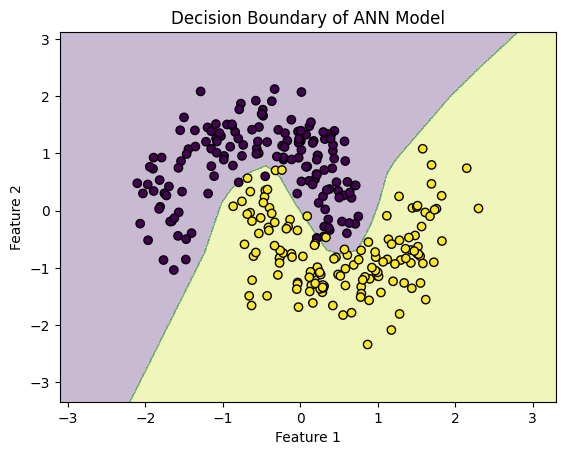

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. 데이터 생성 및 전처리
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. ANN 모델 생성 (은닉층 2개, 각각 10개의 뉴런)
model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 3. 모델 평가
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. 결정 경계 시각화
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title("Decision Boundary of ANN Model")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_test, y_test, model)


# MNIST 손글씨 데이터

## 개요

MNIST 데이터셋은 손으로 쓴 숫자 이미지로 구성되어 있으며, 0부터 9까지의 숫자를 포함하고 있습니다.

MNIST 데이터셋의 주요 특징
샘플 수:
훈련 데이터: 60,000개의 손글씨 숫자 이미지
테스트 데이터: 10,000개의 손글씨 숫자 이미지
총 70,000개의 이미지로 구성되어 있습니다.

이미지 크기:
각 이미지의 크기는 28x28 픽셀입니다.
이미지의 해상도는 낮고 흑백입니다. 픽셀 값은 0에서 255까지의 값으로, 0은 검정색(배경), 255는 흰색(숫자)에 해당합니다.

레이블:
각 이미지에 대응되는 레이블이 존재하며, 이 레이블은 0부터 9까지의 숫자를 나타냅니다.
레이블은 이미지에 나타난 손글씨 숫자를 의미하며, 분류 문제의 목표는 이미지를 보고 숫자를 예측하는 것입니다.

이미지 데이터 형식:
각 이미지는 28x28 픽셀 크기의 2D 배열로 표현되며, 각 픽셀은 0~255 사이의 그레이스케일 값을 가집니다.
예를 들어, 0은 완전한 검정색, 255는 완전한 흰색을 나타냅니다.

데이터셋 구조
x_train, y_train: 훈련 데이터와 훈련 레이블
x_train: (60,000, 28, 28) 크기의 배열로, 60,000개의 이미지와 각 이미지의 28x28 픽셀을 포함합니다.
y_train: 각 이미지에 대응되는 레이블(0~9)
x_test, y_test: 테스트 데이터와 테스트 레이블
x_test: (10,000, 28, 28) 크기의 배열로, 10,000개의 테스트 이미지
y_test: 각 테스트 이미지에 대응되는 레이블

데이터셋 활용
MNIST 데이터셋은 머신러닝 및 딥러닝 알고리즘을 테스트하고 비교하는 데 많이 사용됩니다. 특히, 다음과 같은 모델에 자주 활용됩니다.

주요 단계
1. 데이터 로드 및 전처리
2. MLPClassifier 생성 (은닉층 10개)
3. 모델 학습 및 평가
4. 예측 결과 시각화

은닉층 10개, 출력층 10개인 모델을 만들어 학습하고, 시각화까지 진행

## 모델 생성/ 학습

In [ ]:
# 코드 설명
# 데이터 로드 및 전처리:

# MNIST 데이터셋을 로드하고, [0, 1] 범위로 정규화합니다.
# 학습 데이터와 테스트 데이터로 나누고, 표준화(StandardScaler)를 적용합니다.
# 모델 생성 및 학습:

# 은닉층에 10개의 뉴런을 가진 MLPClassifier를 생성합니다.
# 활성화 함수로 ReLU를 사용하고, 최대 반복 횟수는 300입니다.
# 모델 평가:

# 혼동 행렬과 분류 보고서를 통해 성능을 평가합니다.
# 시각화:

# 일부 테스트 샘플의 실제 레이블과 예측된 레이블을 비교하여 시각적으로 확인합니다.

Confusion Matrix:
[[1286    2   12    0    1   11   19    7    4    1]
 [   0 1547    6   11    1   10    3    6   12    4]
 [   9   14 1263   17   12    9   10   22   22    2]
 [  10    6   38 1280    5   38    4   22   19   11]
 [   1    0   10    0 1217    5    8    4    5   45]
 [   8    6    4   41    5 1137   22    4   34   12]
 [  16    5   12    0   17   15 1321    0    9    1]
 [  16    8   28    8   13    5    0 1385    4   36]
 [   9   24   18   16    5   27   24    7 1211   16]
 [   9    6    3   16   49    9    0   36   15 1277]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1343
           1       0.96      0.97      0.96      1600
           2       0.91      0.92      0.91      1380
           3       0.92      0.89      0.91      1433
           4       0.92      0.94      0.93      1295
           5       0.90      0.89      0.90      1273
           6       0.94      0.95      0.94     

KeyError: 0

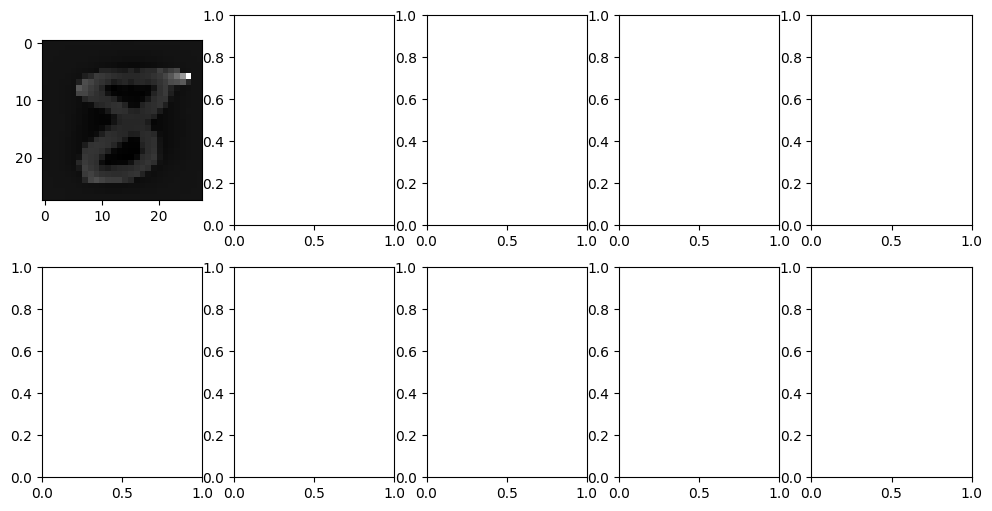

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 1. MNIST 데이터 로드 및 전처리
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# 데이터를 0~1 사이로 정규화
X /= 255.0

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. MLPClassifier 모델 생성 (은닉층 10개, 출력층 10개)
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=300, random_state=42)
model.fit(X_train, y_train)

# 3. 모델 평가
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. 예측 결과 시각화
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    image = X_test[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')

plt.suptitle("MNIST Predictions (True Label vs. Predicted Label)")
plt.show()


# MNIST 손글씨데이터2

TensorFlow와 Keras를 사용하여 MNIST 손글씨 숫자 데이터셋에 대해 간단한 인공 신경망(ANN) 모델을 구축하고 학습하는 예시입니다

In [ ]:
# 인공신경망(ANN): 간단한 신경망을 이용해 손글씨 숫자를 분류하는 문제로 많이 사용됩니다.
# 컨볼루션 신경망(CNN): 이미지 데이터 특성에 맞춰 CNN을 적용하여 더 높은 정확도를 얻을 수 있습니다.
# 기본적인 머신러닝 알고리즘: SVM, KNN, 랜덤 포레스트 등 전통적인 머신러닝 알고리즘으로도 MNIST 분류 문제를 해결할 수 있습니다. -->

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


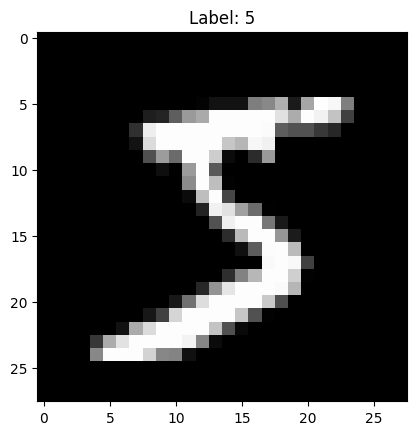

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 첫 번째 이미지 출력
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [ ]:
# MNIST 데이터셋에서 첫 번째 이미지를 출력하고 그에 해당하는 레이블을 확인할 수 있습니다.

In [ ]:
# MNIST 데이터셋은 이미지 분류 문제에서 널리 사용되는 데이터셋으로, 초보자가 딥러닝과 머신러닝을 학습하기에 이상적입니다.
# 픽셀 데이터를 이용한 손글씨 숫자 분류는 다양한 모델의 성능을 비교하고 학습하는 데 매우 유용합니다.

# 실습

## 데이터 준비

In [ ]:
# MNIST 데이터셋 로드: tf.keras.datasets.mnist를 통해 MNIST 데이터를 로드합니다.
# 이 데이터셋은 28x28 크기의 손글씨 숫자 이미지와 각 이미지에 대한 레이블(0~9)이 포함되어 있습니다.
# 정규화(Normalization): 픽셀 값이 0~255 사이의 값이기 때문에, 이를 0~1 사이로 스케일링하여 학습이 잘 이루어지도록 정규화합니다.

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화


 ## 모델 정의

In [ ]:
# Sequential 모델: Sequential()을 통해 각 레이어가 순차적으로 연결되는 신경망 모델을 정의합니다.
# Flatten 층: 입력 데이터가 28x28 이미지이므로 이를 일차원 벡터로 펼쳐줍니다.
# Dense 층: 첫 번째 은닉층으로 128개의 뉴런을 가지며, 활성화 함수로 ReLU를 사용합니다.
# Dense 층을 이용한 다중 클래스 분류 문제를 해결합니다.
# Dropout 층: 과적합을 방지하기 위해 20%의 뉴런을 무작위로 끕니다.
# Dense 출력층: 10개의 뉴런을 가지는 출력층입니다. 소프트맥스(Softmax) 활성화 함수를 사용하여 다중 클래스 분류를 수행합니다.

In [ ]:
# 모델 구조:
# 입력: 28x28 픽셀 크기의 이미지를 펼친 후,
# 128개의 은닉 뉴런을 거쳐,
# 출력층에서 10개의 클래스(숫자 0~9)에 대한 확률을 출력합니다.

In [ ]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 입력층
    layers.Dense(128, activation='relu'),  # 은닉층
    layers.Dropout(0.2),                   # 드롭아웃
    layers.Dense(10, activation='softmax') # 출력층
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 모델 컴파일

In [ ]:
# Optimizer: Adam 옵티마이저를 사용하여 가중치 업데이트를 수행합니다.
# Loss 함수: 다중 클래스 분류 문제이므로 sparse_categorical_crossentropy 손실 함수를 사용합니다. 이는 레이블이 정수로 제공될 때 사용됩니다.
# 평가지표: 모델 성능을 평가하기 위한 지표로 accuracy를 사용합니다.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## 모델 학습

In [ ]:
# 학습: 훈련 데이터를 사용해 5번 반복(에포크)하여 모델을 학습시킵니다.

In [ ]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8604 - loss: 0.4786
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9533 - loss: 0.1526
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9665 - loss: 0.1085
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9729 - loss: 0.0875
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9760 - loss: 0.0751


## 모델 평가

In [ ]:
# 평가: 테스트 데이터를 사용해 학습된 모델을 평가하고 정확도와 손실 값을 출력합니다.

In [ ]:
model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.0880


[0.07412156462669373, 0.9779999852180481]

## 결과 해석

In [ ]:
# 모델 평가 값으로 제공된 두 개의 값 **0.07774345576763153**와 **0.9758999943733215**는 각각 **손실 값(loss)**과 **정확도(accuracy)**를 의미합니다. 이를 설명하겠습니다:

# 1. 손실 값 (Loss): 0.07774345576763153
# 손실(Loss)은 모델이 예측한 값과 실제 정답 사이의 차이를 수치화한 값입니다.
# 이 값은 모델이 얼마나 잘못 예측했는지를 나타냅니다.
# 손실 함수로는 주로 크로스 엔트로피(Categorical Crossentropy)를 사용합니다. 이 값은 낮을수록 모델의 성능이 더 좋다는 의미입니다. 즉, 손실 값이 작으면 모델의 예측이 실제 값에 더 가깝다는 것을 의미합니다.
# 0.0777의 손실 값은 상당히 작은 값으로, 이는 모델이 예측하는 값이 실제 정답과 매우 가까운 결과를 내고 있음을 의미합니다.

# 2. 정확도 (Accuracy): 0.9758999943733215
# 정확도(Accuracy)는 모델이 얼마나 정확하게 예측했는지를 나타내는 값으로, 예측한 값 중에서 실제 정답과 일치하는 비율입니다.
# 0.9759는 정확도가 97.59%임을 의미합니다. 즉, 테스트 데이터에 대해 모델이 97.59%의 정확도로 올바른 예측을 했다는 의미입니다.
# 높은 정확도는 모델이 테스트 데이터에서 상당히 좋은 성능을 발휘하고 있음을 나타냅니다.


In [ ]:
# 종합 설명:
# 손실 값이 0.0777로 낮고, 정확도가 97.59%로 매우 높은 것으로 보아, 이 모델은 주어진 데이터셋에 대해 매우 좋은 성능을 보이고 있다고 해석할 수 있습니다.
# 모델의 목표는 손실 값을 최소화하고 정확도를 최대화하는 것이므로, 이 평가 결과는 훈련된 모델이 테스트 데이터에서도 매우 좋은 성능을 발휘하고 있음을 의미합니다.

# 참고:
# 손실 값은 주로 학습 과정에서 모델의 성능을 평가하는 지표이며, 낮을수록 모델이 더 잘 학습한 것입니다.
# 정확도는 모델이 예측한 정답의 비율을 나타내는 지표로, 분류 문제에서는 중요한 성능 지표입니다.

## 종합 코드

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. 데이터 준비
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화

# 2. 모델 정의
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 입력층
    layers.Dense(128, activation='relu'),  # 은닉층
    layers.Dropout(0.2),                   # 드롭아웃
    layers.Dense(10, activation='softmax') # 출력층
])

# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습
model.fit(x_train, y_train, epochs=5)

# 5. 모델 평가
model.evaluate(x_test, y_test)


c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8592 - loss: 0.4797
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9549 - loss: 0.1558
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9669 - loss: 0.1120
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9718 - loss: 0.0895
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9769 - loss: 0.0734
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9714 - loss: 0.0898


[0.07636785507202148, 0.9760000109672546]

# 드롭아웃(Dropout)

In [ ]:
# TensorFlow와 Keras에서 드롭아웃(Dropout)을 사용하는 간단한 신경망 모델의 예시 코드입니다.
# 드롭아웃은 과적합을 방지하기 위해 뉴런의 일부를 랜덤하게 비활성화하는 기술
# 모델이 학습하는 동안 무작위로 뉴런을 드롭(drop)하여 특정 뉴런에 너무 의존하지 않도록 만듭니다

In [ ]:
# 드롭아웃이 중요한 이유:

# 과적합 방지: 드롭아웃은 모델이 학습할 때 특정 뉴런에 의존하지 않도록 하여,
# 모델이 훈련 데이터에 과도하게 적합(과적합)되는 것을 방지합니다.
# 일반화 성능 향상: 드롭아웃은 모델의 일반화 성능을 향상시켜 새로운 데이터에서도 더 좋은 성능을 발휘할 수 있습니다.

In [ ]:
# 코드 설명:
# 데이터 준비: MNIST 손글씨 숫자 데이터셋을 로드하고, 각 픽셀 값을 0~1 사이로 정규화합니다.
# 모델 정의:
# Flatten: 입력 이미지를 1차원 벡터로 변환합니다.
# Dense(128, activation='relu'): 128개의 뉴런을 가진 은닉층을 정의하며, 활성화 함수로 ReLU를 사용합니다.
# Dropout(0.5): 드롭아웃을 적용해 은닉층의 50% 뉴런을 학습 중 무작위로 비활성화합니다.
# Dense(10, activation='softmax'): 10개의 뉴런을 가진 출력층을 정의하며, softmax 활성화 함수로 다중 클래스 분류를 수행합니다.
# 컴파일: Adam 옵티마이저와 sparse_categorical_crossentropy 손실 함수를 사용하여 모델을 컴파일합니다.
# 모델 학습: 훈련 데이터로 5번의 에포크 동안 모델을 학습시킵니다.
# 모델 평가: 테스트 데이터로 모델을 평가하고 정확도를 출력합니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. 데이터 준비 (MNIST 손글씨 숫자 데이터셋)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리 (0~255 사이의 값을 0~1 사이로 정규화)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3. 모델 정의 (드롭아웃 적용)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),       # 입력층 (28x28 이미지를 펼침)
    layers.Dense(128, activation='relu'),       # 은닉층 (128개의 뉴런)
    layers.Dropout(0.5),                        # 드롭아웃 (50%의 뉴런을 드롭)
    layers.Dense(10, activation='softmax')      # 출력층 (10개의 뉴런, 0~9까지의 숫자 분류)
])

# 4. 모델 컴파일 (손실 함수와 옵티마이저 정의)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 학습 (5번의 에포크 동안 학습)
model.fit(x_train, y_train, epochs=5)

# 6. 모델 평가 (테스트 데이터로 모델 성능 평가)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'테스트 정확도: {test_acc}')


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8158 - loss: 0.5990
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9320 - loss: 0.2290
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9441 - loss: 0.1870
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9513 - loss: 0.1632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9561 - loss: 0.1416
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.0983
테스트 정확도: 0.9749000072479248


# 배치 정규화(Batch Normalization)

In [ ]:
# 배치 정규화(Batch Normalization)**는 신경망 학습 시 각 배치마다 입력값의 분포를 정규화해 학습을 안정시키고,
# 더 높은 학습률을 사용할 수 있도록 도와주는 기법입니다.

In [ ]:
# 배치 정규화의 이점:
# 학습 안정화: 배치 정규화는 각 미니 배치의 입력 데이터를 정규화하여, 학습을 더 안정적으로 만듭니다.
# 과적합 방지: 배치 정규화는 일종의 규제 역할을 하여 모델이 과적합되는 것을 방지할 수 있습니다.
# 더 큰 학습률 사용 가능: 배치 정규화를 통해 더 높은 학습률을 사용할 수 있어, 학습 속도가 빨라질 수 있습니다.

In [ ]:
# 코드설명:
# 데이터 준비:
# MNIST 데이터셋을 로드하고, 각 픽셀 값을 0~1 사이로 정규화합니다.

# 모델 정의:
# Flatten: 28x28 크기의 이미지를 1차원 벡터로 변환합니다.
# Dense(128, activation='relu'): 첫 번째 은닉층으로 128개의 뉴런을 사용하고, 활성화 함수로 ReLU를 사용합니다.
# BatchNormalization(): 첫 번째 은닉층에 대해 배치 정규화를 적용합니다. 이는 각 배치마다 데이터를 평균 0, 분산 1로 정규화하여 학습을 안정화시킵니다.
# Dense(64, activation='relu'): 두 번째 은닉층으로 64개의 뉴런을 사용합니다.
# BatchNormalization(): 두 번째 은닉층에도 배치 정규화를 적용합니다.
# Dense(10, activation='softmax'): 10개의 뉴런을 가진 출력층을 정의하고, softmax 활성화 함수를 사용하여 다중 클래스 분류를 수행합니다.

# 모델 컴파일:
# Adam 옵티마이저와 sparse_categorical_crossentropy 손실 함수를 사용해 모델을 컴파일합니다.

# 모델 학습:
# 훈련 데이터로 5번의 에포크 동안 모델을 학습시킵니다.

# 모델 평가:
# 테스트 데이터로 모델 성능을 평가하고 정확도를 출력합니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. 데이터 준비 (MNIST 손글씨 숫자 데이터셋)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리 (0~255 사이의 값을 0~1 사이로 정규화)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3. 모델 정의 (배치 정규화 적용)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),       # 입력층 (28x28 이미지를 펼침)
    layers.Dense(128, activation='relu'),       # 은닉층 (128개의 뉴런)
    layers.BatchNormalization(),               # 배치 정규화 적용
    layers.Dense(64, activation='relu'),        # 두 번째 은닉층
    layers.BatchNormalization(),               # 두 번째 배치 정규화 적용
    layers.Dense(10, activation='softmax')      # 출력층 (10개의 뉴런, 0~9까지의 숫자 분류)
])

# 4. 모델 컴파일 (손실 함수와 옵티마이저 정의)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 학습 (5번의 에포크 동안 학습)
model.fit(x_train, y_train, epochs=5)

# 6. 모델 평가 (테스트 데이터로 모델 성능 평가)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'테스트 정확도: {test_acc}')


# PyTorch 사례

In [ ]:
# PyTorch는 **Facebook AI Research(FAIR)**에서 개발한 오픈 소스 딥러닝 라이브러리로, 주로 딥러닝 연구와 개발에 사용됩니다. PyTorch는 특히 자연어 처리(NLP), 컴퓨터 비전, 강화 학습 등의 다양한 딥러닝 분야에서 널리 사용되고 있습니다. TensorFlow와 함께 가장 인기 있는 딥러닝 프레임워크 중 하나입니다.

# PyTorch의 주요 특징
# 동적 계산 그래프(Autograd):

# PyTorch는 동적 계산 그래프를 지원하는데, 이는 그래프를 실시간으로 정의하고 변경할 수 있는 기능을 의미합니다. 즉, 모델이 실행되는 동안 계산 그래프가 생성되며, 복잡한 계산이 실시간으로 수행됩니다.
# 이 동적 특성 덕분에 디버깅이 쉽고, 유연한 모델 설계가 가능합니다. 모델의 구조를 쉽게 변경하거나 실시간으로 결과를 확인하면서 작업할 수 있습니다.
# NumPy와 유사한 텐서(Tensor) 연산:

# PyTorch는 Tensor라는 객체를 통해 다차원 배열을 처리합니다. Tensor는 NumPy 배열과 유사하지만, GPU를 통해 병렬 연산을 수행할 수 있다는 차이가 있습니다.
# Tensor는 딥러닝 모델의 가중치, 입력, 출력 등으로 사용되며, 이로 인해 PyTorch는 GPU를 활용한 고속 연산을 지원합니다.
# GPU 가속 지원:

# PyTorch는 GPU를 사용하여 연산 속도를 크게 높일 수 있습니다. 간단하게 tensor.to('cuda') 명령을 통해 GPU에서 텐서 연산을 수행할 수 있습니다.
# GPU 지원 덕분에 대용량 데이터셋이나 복잡한 신경망 모델을 학습할 때 훨씬 더 빠르게 처리할 수 있습니다.
# 모듈형 설계:

# PyTorch는 매우 직관적이고 모듈형으로 설계되어 있어, 복잡한 신경망 구조도 쉽게 정의할 수 있습니다. 모델을 구성하는 레이어, 손실 함수, 옵티마이저 등을 모두 모듈 단위로 구성할 수 있습니다.
# 또한, PyTorch의 torch.nn.Module 클래스를 상속받아 커스텀 신경망을 직접 설계할 수 있습니다.
# 풍부한 라이브러리와 생태계:

# PyTorch는 연구와 상용 개발 모두에 적합한 다양한 도구들을 제공합니다. torchvision, torchaudio, torchtext 등은 컴퓨터 비전, 오디오 처리, 자연어 처리에 사용되는 데이터셋과 모델을 손쉽게 다룰 수 있는 라이브러리입니다.
# 또한, PyTorch Lightning, fast.ai와 같은 고수준 API도 있어 빠르게 프로토타입을 만들고 학습을 진행할 수 있습니다.

In [ ]:
# torchvision 설치

In [ ]:
pip install torchvision

In [ ]:
# 해결 방법
# 1. PyTorch 및 torchvision 최신 버전 재설치
# 해당 오류는 PyTorch 및 torchvision의 버전 불일치나 손상된 설치로 인해 발생할 수 있습니다.
# 먼저 PyTorch 및 torchvision을 최신 버전으로 재설치하세요.

In [ ]:
# PyTorch 및 관련 라이브러리 제거

In [ ]:
pip uninstall torch torchvision torchaudio

In [ ]:
# PyTorch 및 torchvision 재설치

In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# 데이터 준비

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 데이터 준비
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

# 모델 학습 및 평가
model = MLP()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

print("Training complete")


In [ ]:
# 데이터 전처리:
# transforms.ToTensor()는 이미지를 PyTorch 텐서로 변환합니다.
# transforms.Normalize((0.5,), (0.5,))는 각 픽셀 값을 -1에서 1 사이로 정규화합니다.
# 데이터셋 로드:
# datasets.MNIST()를 통해 MNIST 데이터셋을 다운로드하고 로드합니다. train=True는 훈련 데이터를, train=False는 테스트 데이터를 가져옵니다.
# DataLoader:
# DataLoader는 데이터를 미니 배치로 나누고, 모델 학습 시 사용할 수 있도록 제공합니다. batch_size=64는 훈련 시 64개의 샘플을 한 번에 처리하고, 테스트 시에는 1000개의 샘플을 처리합니다.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)


In [ ]:
# 2.MLP(다층 퍼셉트론) 모델:

In [ ]:

# 입력층: MNIST 데이터셋의 각 이미지는 28x28 픽셀 크기이므로, 이를 28 * 28로 펼쳐서 784개의 입력 노드를 가진 벡터로 변환합니다.
# 은닉층: 은닉층은 128개의 노드로 구성되며, 활성화 함수로 ReLU(Rectified Linear Unit)를 사용합니다.
# 출력층: 10개의 출력 노드로 구성되어 있으며, 이는 0부터 9까지의 숫자에 해당하는 클래스를 나타냅니다. log_softmax 함수를 사용하여 출력값을 확률 분포로 변환합니다.

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)


In [ ]:
# 3.손실 함수와 최적화 설정

In [ ]:
# 손실 함수:
# nn.NLLLoss()는 음의 로그 가능도 손실 함수로, log_softmax와 함께 사용됩니다. 이 함수는 분류 문제에서 자주 사용됩니다.
# 최적화 기법:
# Adam 옵티마이저를 사용하여 모델의 파라미터를 업데이트합니다. 학습률은 lr=0.001로 설정됩니다.

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# 4. 학습 과정

In [ ]:
# 학습 함수:
# model.train()은 모델을 학습 모드로 설정합니다.
# 각 배치에 대해, optimizer.zero_grad()로 이전 배치의 그라디언트를 초기화하고, 모델의 예측값(output)과 실제값(target) 간의 손실을 계산합니다.
# 그라디언트(loss.backward())를 통해 모델의 파라미터를 업데이트합니다.

In [ ]:
def train(model, train_loader, optimizer, criterion):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()


In [ ]:
# 5. 모델 평가 과정

In [ ]:
# 평가 함수:
# model.eval()은 평가 모드로 설정하며, torch.no_grad()는 평가 중에 그라디언트를 계산하지 않도록 설정하여 메모리와 계산 시간을 절약합니다.
# 예측된 값(pred)과 실제 값(target)을 비교하여 정확도를 계산합니다.

In [ ]:
def test(model, test_loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    print(f'Test Accuracy: {correct / len(test_loader.dataset)}')


In [ ]:
# 학습 및 평가

In [ ]:
for epoch in range(1, 6):
    train(model, train_loader, optimizer, criterion)
    test(model, test_loader)
